<a href="https://colab.research.google.com/github/7201krap/PYTHON_applied_data_science/blob/main/apr17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

# How are we going to use evaluate the performance? 
# 1. accuracy
from sklearn import metrics
# 2. f1 score 
from sklearn.metrics import f1_score

# Machine learning models 

# Linear Regression 
# url : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression

# SVM
# url: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn import svm

# KNN 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree
# url: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier

# Random Forest 
# url: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Logistic Classifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt

# PCA 
from sklearn.decomposition import PCA 

# Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

Here, I use cancer dataset for tutorials.
It can be simply changed to another dataset

## Machine learning algorithms that we are going to use

- SVM

- Random Forest 

- Decision Tree 

- Softmax 

- KNN 

## Preprocess all data
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

In [2]:
sampled_secd_diag = pd.read_csv('sampled_secd_diag.csv')

target = sampled_secd_diag['secd_diag'].copy()

data = sampled_secd_diag.copy()
del data['secd_diag']

Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Labels: 
 ['setosa' 'versicolor' 'virginica']


In [3]:
data

X data: 4
Y data: 3


In [ ]:
target

## PCA section

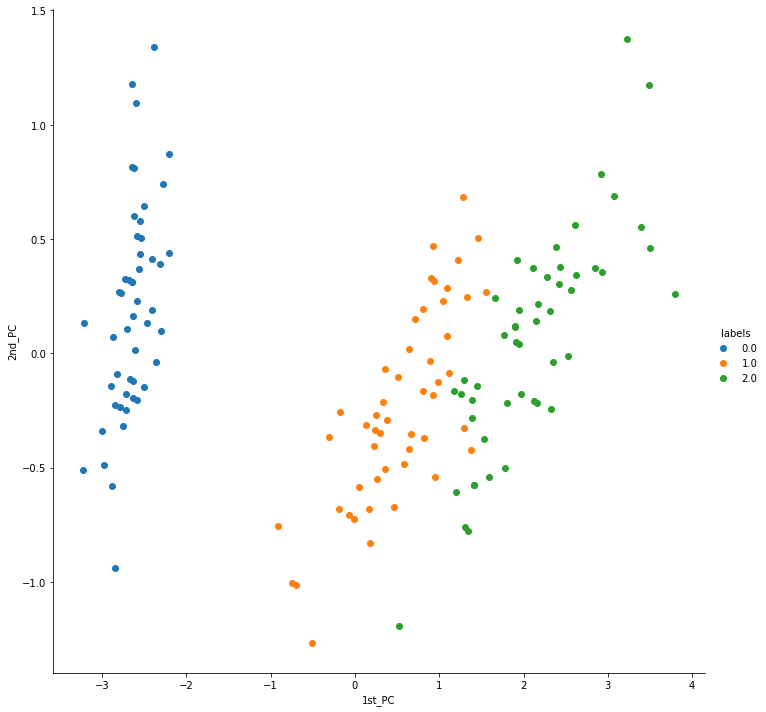

In [4]:
pca = PCA(n_components=2, random_state=1)
pca_data = pca.fit_transform(data)

data_with_labels = np.vstack((pca_data.T, target)).T
pca_df = pd.DataFrame(data=data_with_labels, columns=('1st_PC', '2nd_PC', 'labels'))
sns.FacetGrid(pca_df, hue='labels', height=10).map(plt.scatter, '1st_PC', '2nd_PC').add_legend()
plt.show()

In [5]:
pca_df

,1st_PC,2nd_PC,labels
0,-2.684126,0.319397,0.0
1,-2.714142,-0.177001,0.0
2,-2.888991,-0.144949,0.0
3,-2.745343,-0.318299,0.0
4,-2.728717,0.326755,0.0
...,...,...,...
145,1.944110,0.187532,2.0
146,1.527167,-0.375317,2.0
147,1.764346,0.078859,2.0
148,1.900942,0.116628,2.0


## Generate Train and Test

In [6]:
from sklearn.model_selection import train_test_split

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Generate Train and Test - Others

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=1)  # 70% training and 30% test

## Linear Regression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_pca_train, y_pca_train)

y_pca_pred = lin_reg.predict(X_pca_test)

mse = mean_squared_error(y_pca_test, y_pca_pred)
rmse = np.sqrt(mse)
r2_point = r2_score(y_pca_test, y_pca_pred)


print("RMSE value: ", rmse)
print("R2 value: ", r2_point)

## SVM

In [7]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [8]:
svm_hyper_params = [ 
                        {
                        'gamma': np.logspace(-5, 2, 8),
                        'C': np.logspace(-5, 2, 8),
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
                        }
                    ]

# specify model
svm_model = svm.SVC(random_state=1)

# set up GridSearchCV()
svm_model_cv = GridSearchCV(estimator = svm_model, 
                            param_grid = svm_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [9]:
# fit the model
svm_model_cv.fit(X_train, y_train)
print("best hyper parameters", svm_model_cv.best_params_)
svm_y_pred = svm_model_cv.predict(X_test)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1728 tasks      | elapsed:    3.6s


best hyper parameters {'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  1.1min finished


In [10]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, svm_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, svm_y_pred, average='micro'))

Accuracy: 0.9777777777777777
F1 score: 0.9777777777777777


## Logistic Regression

In [11]:
log_hyper_params = [ 
                        {
                        'C': np.logspace(-5, 2, 8),
                        'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                        'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                        'multi_class' : ['auto', 'ovr', 'multinomial']
                        }
                    ]

# specify model
log_model = LogisticRegression(random_state=1)

# set up GridSearchCV()
log_model_cv = GridSearchCV(estimator = log_model, 
                            param_grid = log_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [12]:
# fit the model
log_model_cv.fit(X_train, y_train)
print("best hyper parameters", log_model_cv.best_params_)
log_y_pred = log_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 480 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Done 4146 tasks      | elapsed:    4.3s


best hyper parameters {'C': 1e-05, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}


[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    4.9s finished
C:\Users\parkj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [13]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, log_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, log_y_pred, average='micro'))

Accuracy: 0.9777777777777777
F1 score: 0.9777777777777777


## KNN

In [14]:
knn_hyper_params = [ 
                        {
                        'weights' : ['uniform', 'distance'],
                        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
                        'leaf_size' : np.linspace(2, 100, 10, dtype=int)
                        }
                    ]

# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
knn_model = KNeighborsClassifier(n_neighbors=3)

# set up GridSearchCV()
knn_model_cv = GridSearchCV(estimator = knn_model, 
                            param_grid = knn_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [15]:
# fit the model
knn_model_cv.fit(X_train, y_train)
print("best hyper parameters", knn_model_cv.best_params_)
knn_y_pred = knn_model_cv.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s


Fitting 10 folds for each of 80 candidates, totalling 800 fits
best hyper parameters {'algorithm': 'auto', 'leaf_size': 2, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:    0.8s finished


In [16]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, knn_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, knn_y_pred, average='micro'))

Accuracy: 1.0
F1 score: 1.0


## Random Forest

In [17]:
rf_hyper_params = [ 
                        {
                            'n_estimators' : [int(x) for x in np.linspace(5, 50, 5)],
                            'criterion' : ['gini', 'entropy'],
                            'max_depth' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_split' : [int(x) for x in np.linspace(2, 50, 5)],
                            'min_samples_leaf' : [int(x) for x in np.linspace(2, 50, 5)],
                            'max_features' : ['auto', 'sqrt', 'log2'],
                            'bootstrap' : [True, False]

                        }
                    ]


# specify model

# THIS SECTION SHOULD BE CHANGED.
# n_neighbors  SHOULD BE MODIFIED TO ANOTHER VALUE DEPENDING ON THE TARGET VALUE.
rf_model = RandomForestClassifier(random_state=1)

# set up GridSearchCV()
rf_model_cv = GridSearchCV(estimator = rf_model, 
                            param_grid = rf_hyper_params, 
                            scoring= 'accuracy', 
                            cv = folds, 
                            verbose = 2,
                            return_train_score=True,
                            n_jobs=-1)      

In [ ]:
# fit the model
rf_model_cv.fit(X_train, y_train)
print("best hyper parameters", rf_model_cv.best_params_)
rf_y_pred = rf_model_cv.predict(X_test)

Fitting 10 folds for each of 120000 candidates, totalling 1200000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 2009 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2616 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3305 tasks      | elapsed:  5.1min


In [ ]:
# accuracy 
print("Accuracy:", metrics.accuracy_score(y_test, rf_y_pred))
# f1 score 
print("F1 score:", f1_score(y_test, rf_y_pred, average='micro'))